In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
quarters=['Q1','Q2','Q3','Q4']

In [5]:
quarters=pd.DataFrame(quarters)

In [6]:
quarters

,0
0,Q1
1,Q2
2,Q3
3,Q4


In [7]:
Quarters=pd.DataFrame(np.tile(quarters,(11,1)))

In [8]:
Quarters

,0
0,Q1
1,Q2
2,Q3
3,Q4
4,Q1
5,Q2
6,Q3
7,Q4
8,Q1
9,Q2


In [9]:
Cocacola=pd.concat([cocacola,Quarters],axis=1)

In [10]:
Cocacola

,Quarter,Sales,0
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [11]:
Cocacola=Cocacola.dropna()

In [12]:
Cocacola.columns=['Quarter','Sales','quarters']

In [13]:
Quarter_dummies=pd.get_dummies(Cocacola['quarters'])

In [14]:
Cocacola=pd.concat([Cocacola,Quarter_dummies],axis=1)
Cocacola['t']=np.arange(1,43)
Cocacola['t_sq']=Cocacola['t']*Cocacola['t']
Cocacola['log_sales']=np.log(Cocacola['Sales'])

In [15]:
Train=Cocacola[0:30]
Test=Cocacola[30:]

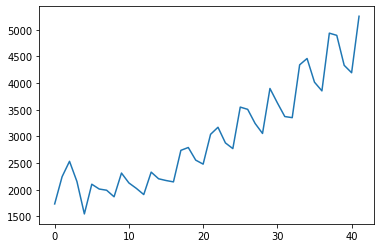

In [16]:
plt.plot(Cocacola.iloc[:,1])
plt.show()

In [17]:
Test.set_index(np.arange(1,13),inplace=True)

Linear  Model

In [19]:
import statsmodels.formula.api as smf

In [20]:
lin_model=smf.ols('Sales~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Sales']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

714.0144483281302

Exponential Model

In [21]:
exp_model=smf.ols('log_sales~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Sales']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

4252.188990972336

Quadratic Model

In [22]:
quad_model=smf.ols('Sales~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Sales']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad
rmse_quad

646.2715428311276

Additive Seasonality

In [23]:
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_add_sea=Test['Sales']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

1778.006546794137

Additive Seasonality Quadratic

In [24]:
add_sea_quad_model=smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']])
error_add_sea_quad=Test['Sales']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

586.0533067870399

Mutiplicative Seasonality

In [25]:
mul_sea_model=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_mul_sea=Test['Sales']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

4252.638677789394

Multiplicative Additive Seasonality

In [26]:
mul_add_sea_model=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Q1','Q2','Q3','Q4']])
error_mul_add_sea=Test['Sales']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea

4252.185655793222

In [27]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table

,model,rmse_val
0,lin_model,714.014448
1,exp_model,4252.188991
2,quad_model,646.271543
3,add_sea,1778.006547
4,add_sea_quad,586.053307
5,mul_sea,4252.638678
6,mul_add_sea,4252.185656




*   Additive Seasonality Quadratic is having least rmse
*   So Additive Seasonality Quadratic model is the best model

